In [3]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load dataset
df = pd.read_csv("preprocessed_emoji_dataset.csv")
tweets = df['tweet'].astype(str).tolist()

# Load SBERT model (xlm-r-100langs-bert-base-nli-stsb-mean-tokens)
model = SentenceTransformer('xlm-r-100langs-bert-base-nli-stsb-mean-tokens')

# Generate embeddings for tweets
embeddings = model.encode(tweets, batch_size=32, show_progress_bar=True)

# Save embeddings
np.save("embeddings_xlmr_base-3.npy", embeddings)

print("Embeddings saved successfully.") 

/Users/ananya/Desktop/MAJOR/my_newmajor/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/1775 [00:00<?, ?it/s]

Embeddings saved successfully.


Training Logistic Regression...
Fold 1 - Train Accuracy: 0.7911, Test Accuracy: 0.7788
Fold 2 - Train Accuracy: 0.7910, Test Accuracy: 0.7796
Fold 3 - Train Accuracy: 0.7879, Test Accuracy: 0.7881
Fold 4 - Train Accuracy: 0.7915, Test Accuracy: 0.7749
Fold 5 - Train Accuracy: 0.7899, Test Accuracy: 0.7828
Average Test Accuracy for Logistic Regression: 0.7808
Average Test F1-Score for Logistic Regression: 0.7808
Average Test Precision for Logistic Regression: 0.7809
Average Test Recall for Logistic Regression: 0.7808



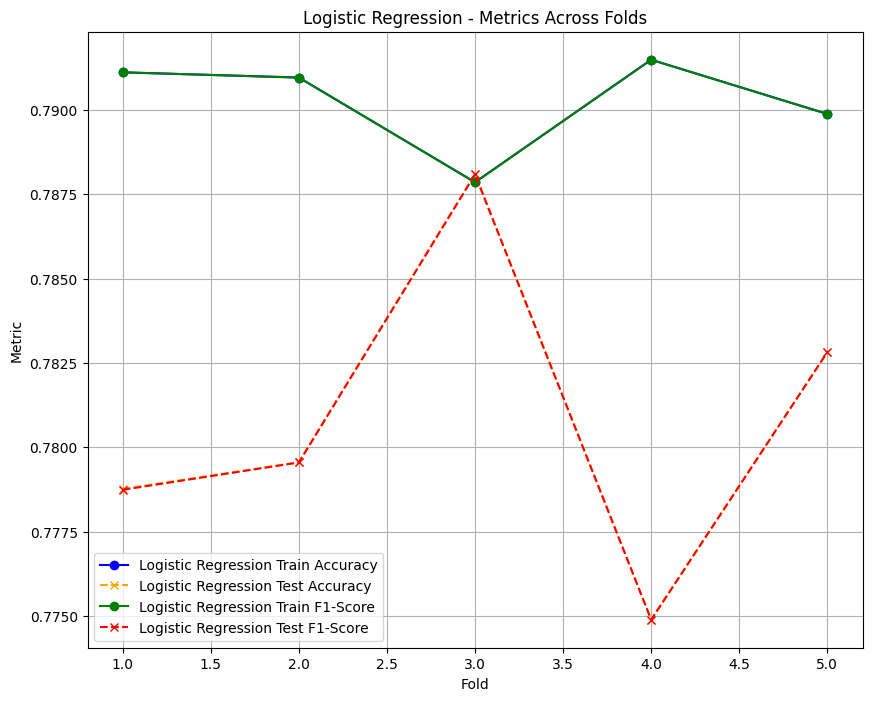

Training SVM...
Fold 1 - Train Accuracy: 0.8434, Test Accuracy: 0.8014
Fold 2 - Train Accuracy: 0.8444, Test Accuracy: 0.8127
Fold 3 - Train Accuracy: 0.8421, Test Accuracy: 0.8130
Fold 4 - Train Accuracy: 0.8458, Test Accuracy: 0.8042
Fold 5 - Train Accuracy: 0.8407, Test Accuracy: 0.8127
Average Test Accuracy for SVM: 0.8088
Average Test F1-Score for SVM: 0.8087
Average Test Precision for SVM: 0.8095
Average Test Recall for SVM: 0.8088



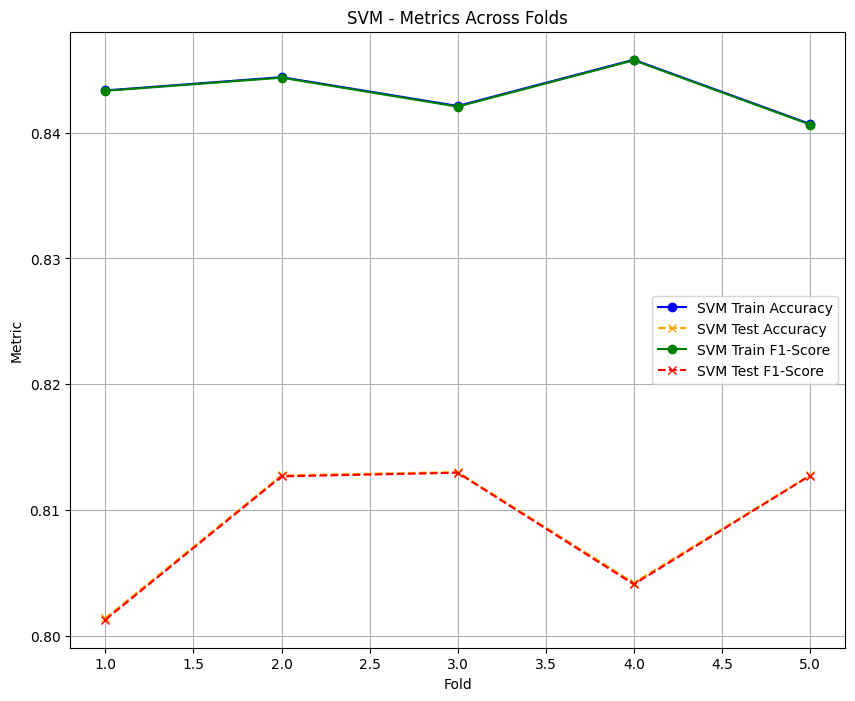

Training Random Forest...
Fold 1 - Train Accuracy: 0.9941, Test Accuracy: 0.8204
Fold 2 - Train Accuracy: 0.9938, Test Accuracy: 0.8246
Fold 3 - Train Accuracy: 0.9938, Test Accuracy: 0.8257
Fold 4 - Train Accuracy: 0.9939, Test Accuracy: 0.8193
Fold 5 - Train Accuracy: 0.9938, Test Accuracy: 0.8338
Average Test Accuracy for Random Forest: 0.8248
Average Test F1-Score for Random Forest: 0.8246
Average Test Precision for Random Forest: 0.8264
Average Test Recall for Random Forest: 0.8248



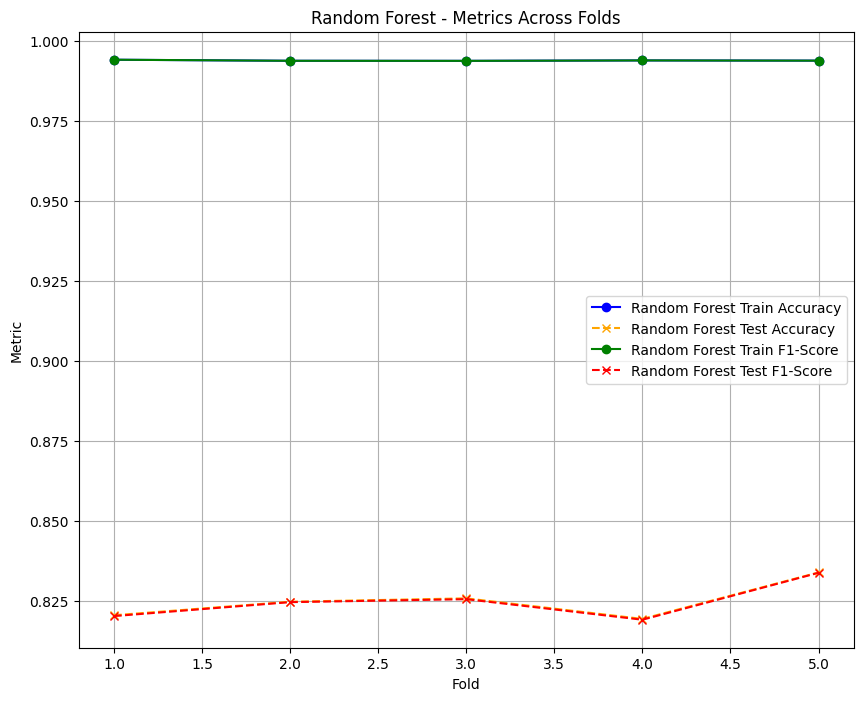

Training k-NN...


Python(6328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Fold 1 - Train Accuracy: 0.8484, Test Accuracy: 0.7744
Fold 2 - Train Accuracy: 0.8446, Test Accuracy: 0.7835
Fold 3 - Train Accuracy: 0.8465, Test Accuracy: 0.7788
Fold 4 - Train Accuracy: 0.8458, Test Accuracy: 0.7770
Fold 5 - Train Accuracy: 0.8445, Test Accuracy: 0.7816
Average Test Accuracy for k-NN: 0.7790
Average Test F1-Score for k-NN: 0.7790
Average Test Precision for k-NN: 0.7792
Average Test Recall for k-NN: 0.7790



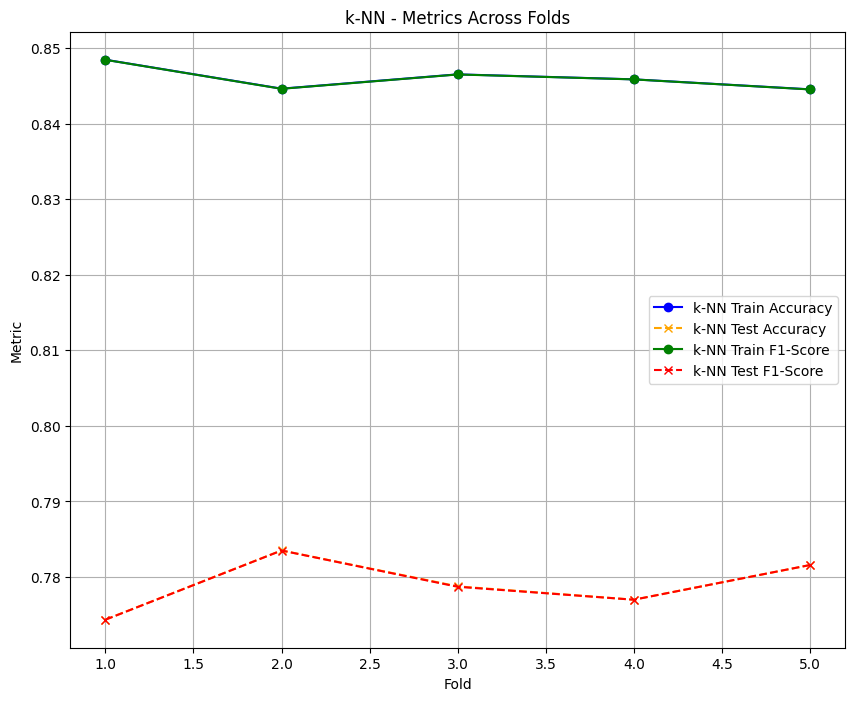

Training Decision Tree...
Fold 1 - Train Accuracy: 0.9941, Test Accuracy: 0.7665
Fold 2 - Train Accuracy: 0.9938, Test Accuracy: 0.7798
Fold 3 - Train Accuracy: 0.9938, Test Accuracy: 0.7728
Fold 4 - Train Accuracy: 0.9939, Test Accuracy: 0.7621
Fold 5 - Train Accuracy: 0.9938, Test Accuracy: 0.7836
Average Test Accuracy for Decision Tree: 0.7730
Average Test F1-Score for Decision Tree: 0.7730
Average Test Precision for Decision Tree: 0.7730
Average Test Recall for Decision Tree: 0.7730



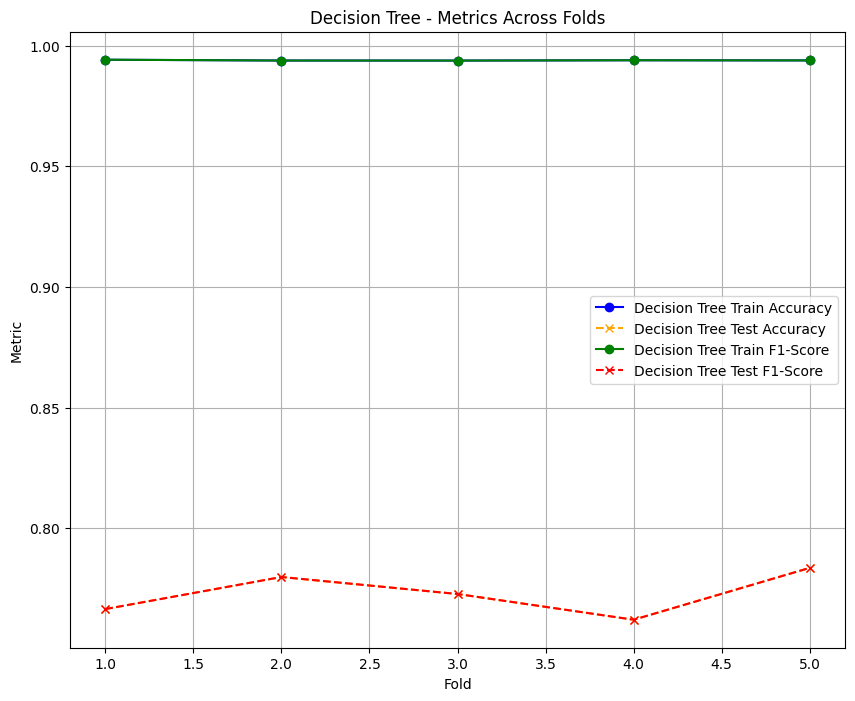

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  
import matplotlib.pyplot as plt

# Load saved embeddings
embeddings = np.load("embeddings_xlmr_base-3.npy")

# Load labels directly from the dataset
df = pd.read_csv("preprocessed_emoji_dataset.csv")
labels = df['label'].values

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()  
}

# Dictionaries to store metrics for each model
metrics = ['accuracy', 'f1_score', 'precision', 'recall']
all_train_metrics = {name: {metric: [] for metric in metrics} for name in classifiers.keys()}
all_test_metrics = {name: {metric: [] for metric in metrics} for name in classifiers.keys()}

for name, model in classifiers.items():
    print(f"Training {name}...")
    
    fold_num = 1
    for train_index, test_index in kf.split(embeddings):
        X_train, X_test = embeddings[train_index], embeddings[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        # Train the model
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics for train data
        train_acc = accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        train_precision = precision_score(y_train, y_train_pred, average='weighted')
        train_recall = recall_score(y_train, y_train_pred, average='weighted')

        # Calculate metrics for test data
        test_acc = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        test_recall = recall_score(y_test, y_test_pred, average='weighted')

        # Store metrics
        all_train_metrics[name]['accuracy'].append(train_acc)
        all_train_metrics[name]['f1_score'].append(train_f1)
        all_train_metrics[name]['precision'].append(train_precision)
        all_train_metrics[name]['recall'].append(train_recall)

        all_test_metrics[name]['accuracy'].append(test_acc)
        all_test_metrics[name]['f1_score'].append(test_f1)
        all_test_metrics[name]['precision'].append(test_precision)
        all_test_metrics[name]['recall'].append(test_recall)

        print(f"Fold {fold_num} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
        fold_num += 1
    
    avg_test_accuracy = np.mean(all_test_metrics[name]['accuracy'])
    avg_test_f1 = np.mean(all_test_metrics[name]['f1_score'])
    avg_test_precision = np.mean(all_test_metrics[name]['precision'])
    avg_test_recall = np.mean(all_test_metrics[name]['recall'])

    print(f"Average Test Accuracy for {name}: {avg_test_accuracy:.4f}")
    print(f"Average Test F1-Score for {name}: {avg_test_f1:.4f}")
    print(f"Average Test Precision for {name}: {avg_test_precision:.4f}")
    print(f"Average Test Recall for {name}: {avg_test_recall:.4f}\n")

    # Plot the results
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, 6), all_train_metrics[name]['accuracy'], marker='o', label=f'{name} Train Accuracy', color='blue')
    plt.plot(range(1, 6), all_test_metrics[name]['accuracy'], marker='x', linestyle='--', label=f'{name} Test Accuracy', color='orange')
    plt.plot(range(1, 6), all_train_metrics[name]['f1_score'], marker='o', label=f'{name} Train F1-Score', color='green')
    plt.plot(range(1, 6), all_test_metrics[name]['f1_score'], marker='x', linestyle='--', label=f'{name} Test F1-Score', color='red')
    plt.xlabel('Fold')
    plt.ylabel('Metric')
    plt.title(f'{name} - Metrics Across Folds')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
